# cadCAD Experiment

In [1]:
import matplotlib.pyplot as plt
from model.run import run

df = run()

print(df)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (90, 6, 1, 7)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
should_make_claims={}
should_make_claims={}
should_make_claims={0: False}
should_make_claims={0: False}
should_make_claims={0: False, 1: False}
should_make_claims={0: True, 1: False}
should_make_claims={0: False, 2: False}
should_make_claims={0: False, 2: False, 3: False}
should_make_claims={0: False, 2: True, 3: False}
should_make_claims={0: True, 2: False, 3: False}
should_make_claims={0: False, 2: False, 3: True, 4: False}
should_make_claims={2: False, 3: False, 4: False, 5: False}
should_make_claims={2: False, 4: False, 6: Fa

Text(0, 0.5, 'Broker Holdings')

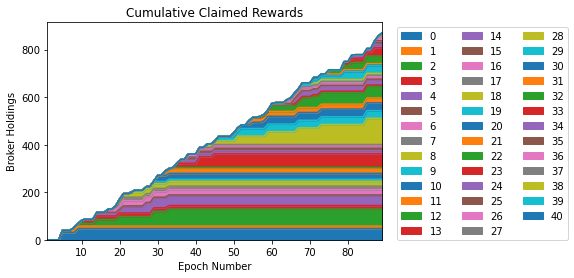

In [2]:
import pandas as pd
df1 = df.reset_index().brokers

broker_holdings = {}
timestep = 0
for broker_dict in df1:
    for broker_id, broker in broker_dict.items():
        if broker_id not in broker_holdings:
            broker_holdings[broker_id] = {}
        broker_holdings[broker_id][timestep] = broker.holdings
        
    timestep += 1

df_plot = pd.DataFrame(broker_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Claimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('Broker Holdings')

Text(0, 0.5, 'Broker Claimable Funds')

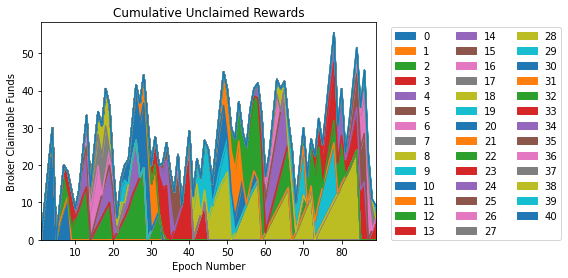

In [3]:
import pandas as pd
df1 = df.reset_index().brokers

broker_claimable = {}
timestep = 0
for broker_dict in df1:
    for broker_id, broker in broker_dict.items():
        if broker_id not in broker_claimable:
            broker_claimable[broker_id] = {}
        broker_claimable[broker_id][timestep] = broker.claimable_funds
        
    timestep += 1

df_plot = pd.DataFrame(broker_claimable)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Unclaimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('Broker Claimable Funds')

Text(0.5, 1.0, 'Capital in the Agreement')

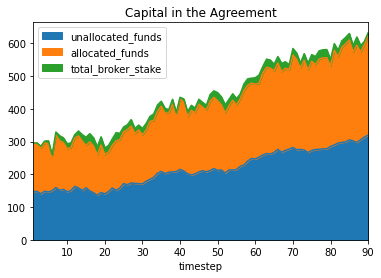

In [8]:
df.plot(x='timestep', y=['unallocated_funds', 'allocated_funds', 'total_broker_stake'],kind='area')
plt.title('Capital in the Agreement')

<AxesSubplot:xlabel='timestep'>

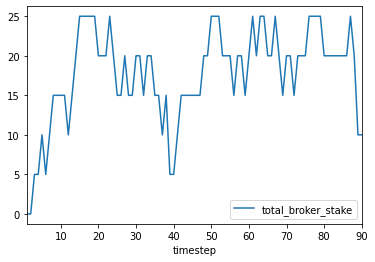

In [9]:
df.plot(x='timestep',y='total_broker_stake')

<AxesSubplot:xlabel='timestep'>

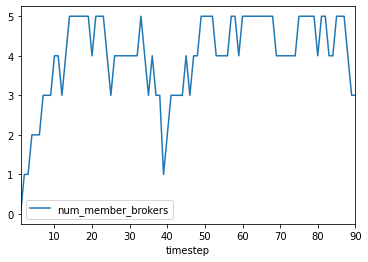

In [6]:
df.plot(x='timestep',y='num_member_brokers')

Worth further investigating why 5 times num_member_brokers is not just equal to the total broker stake. Its close but i am thinking maybe there is something off in the accounting.